<a href="https://www.kaggle.com/code/khoatran311/synthetic-series-generation?scriptVersionId=216902511" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
SIZE = 1500

DRIFT = 3
## Autoregressive coefficients 
PHI1 = .256
PHI2 = -.233
PHI3 = -.15123
PHI4 = .1523
COEFS = np.array([PHI4, PHI3, PHI2, PHI1])

SEASONALITY_12  = lambda t: 4.5*np.sin(2 * np.pi * t / 12) + np.random.normal(loc=2.0, scale=1.5)
SEASONALITY_7   = lambda t: 2.3*np.sin(2 * np.pi * t / 7)  + np.random.normal(loc=2.0, scale=1.5)
SEASONALITY_100 = lambda t: -5.6*np.cos(2 * np.pi * t / 100) + np.random.normal(loc=2.0, scale=1.25)

TREND = lambda t: 0.005 * t + np.random.normal(loc=0, scale=1)

x0 = 1.24
x1 = PHI1*x0
x2 = PHI1*x1 + PHI2*x0
x3 = PHI1*x2 + PHI2*x1 + PHI3*x0
series = [x0, x1, x2, x3]

In [3]:
for k in range(4, SIZE):
    trend = TREND(k)
    seasonality = SEASONALITY_12(k) + SEASONALITY_7(k) + SEASONALITY_100(k)
    value = DRIFT + np.dot(COEFS, np.array(series[-4:])) + trend + seasonality
    value += np.random.normal(loc=0, scale=1)
    series.append(value)
    
series = np.array(series) 

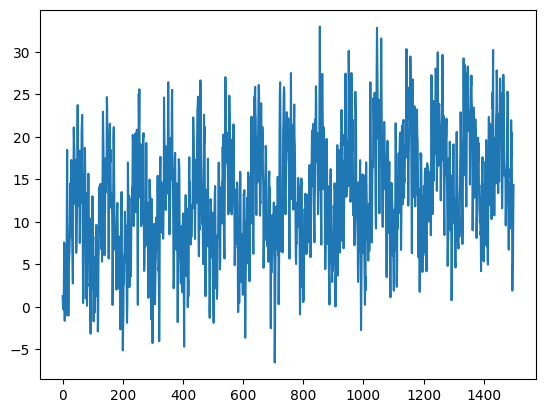

In [4]:
plt.plot(series)
plt.show()

In [5]:
data = pd.DataFrame({
    "minute":np.arange(1,SIZE+1),
    "value":series
})

In [6]:
data.to_csv("synthetic_series.csv", index=False)